# Data Discovery & Visualisation Assignment 2 Report <a id="top"></a>

### Name: Shannon Yum Wan Ning
### Student ID: S10223327G 
### Video Link: https://web.microsoftstream.com/video/a97627e4-9f88-4186-91fe-5104e96f831f

## Table of Contents: 
#### 1. [Project Objectives](#part1)
   - [1.1 Primary Exploratory Questions](#part1.1)  
   
   
#### 2. [Data Preparations](#part2)
   - [2.1 State of Data](#part2.1)  
   - [2.2 Data Preparation Steps](#part2.2)
   
   
#### 3. [Visualisations](#part3)
   - [3.1 Visualisations](#part3.1)  
   - [3.2 Core Findings & Insights](#part3.2)
   - [3.3 Description of Visualisations & Which Question it Answers](#part3.3)
   
   
#### 4. [Dashboard](#part4)


#### 5. [Conclusion](#part4)

# Project Objectives <a id="part1"></a>


###  1.1 Primary Exploratory Questions <a id="part1.1"></a> 

For this project, some primary exploratory questions that I am trying to answer with my visualisations include: **Question 1** – *(Customer Analysis)* Which customers generated the most profit in the past 5 years? Who was the most frequent customer? **Question 2** – *(Product Analysis)* What are the top 3 Product Categories that were purchased the most frequently by customers? **Question 3** – *(Product Analysis)* What is the most common quantity of products (by Product CategoryName) that customers usually buy? **Question 4** – *(Price Analysis)* Does the product unit price vary across Product Category? Which shows the most and least variation? **Question 5** – *(Place Analysis)*  Which countries generated the least revenue and profits in the last 5 years? **Question 6** – *(Price Analysis)* Which month in 2018 saw the highest increase in revenue generated? How much was the increase? **Question 7** – *(Price Analysis)* How does the discount offered vary with volume? Is there a linear or exponential increase in discount? 

[Back to top](#top)

# Data Preparations <a id="part2"></a>

###  2.1 Intial State of Data <a id="part2.1"></a> 

At a first glance from the **csv file on excel**, the data seems to be rather clean. Only the **Unit Discount in %** column shocked me a little with very precise percentages when I expanded the column as well as many rows filled with zeros. In contrast, other columns seemed to conform to their own standardized patterns, with no **out-of-the-ordinary** values to be seen. 

_Setting Up in Jupyter Before Data Preparation Steps:_

After setting the data up in Jupyter Notebook, the **Unit Discount in %** column had now been cleanly displayed in a more legiable form such as _0.05 or 0.15_ instead of the precise percentages mentioned earlier. Nonetheless, I proceeded on to check over the **number of items and respective data types of each column**. I ensured that there were _no null values_ to deal with for all columns presented before moving on to cleaning.

[Back to top](#top)

###  2.2 Data Preparation Steps <a id="part2.2"></a> 

In order to prepare my data so that it is suitable for exploration and analysis later on, here are the few steps that I did to clean in order to be able to fully utilise the columns later on. 

1. The data was opened as a csv file on Excel and I assessed what was put-forth on face-value.  
2. I made sure that all the columns were either filled with values or presented properely (e.g. 0) else NaN/na
3. Afterwards, I set up the csv file in Jupyter Notebook and proceeded to open it.
4. The opened data was then read and re-assessed through functions such as .info or .head() 
5. Then, I backed up the original data set as a good practise.  
6. Since I wanted to use some aggregated values of the data to use for my visuals (e.g. Revenue, Profits), I created new columns to hold these individual aggregated data. 
7. The data was then checked again using .info() and.head() to ensure consistency and accurracy

[Back to top](#top)

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
# Load car loans financing data into a pandas dataframe from a csv file
filename = 'Dart_Sales_Transactional_Data.csv'
df = pd.read_csv(filename)

In [3]:
# View the first 5 rows of the dataframe
df.head(5)

,OrderID,Order Year,Order Quarter,Order Month,Order Day,Customer Name,Customer Country,Customer City,ProductName,Product CategoryName,Quantity,UnitPrice in USD,Unit Discount in %,UnitCost in USD,Shipper Name,Freight Cost (Paid by Customer)
0,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Desperado Jeans,Men's Clothes,12,28.62,0.0,21.10,SafeAndFast,175.93
1,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Oyaki Kimono,Women's Clothes,5,12.71,0.0,8.96,SafeAndFast,175.93
2,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Walking Shoes,Women's Footwear,10,14.04,0.0,10.95,SafeAndFast,175.93
3,10249,2017,Qtr 1,January,29,Boombastic,Germany,Münster,Kool Sunglasses,Children's Clothes,9,22.80,0.0,20.36,SafeAndFast,1204.80
4,10249,2017,Qtr 1,January,29,Boombastic,Germany,Münster,Summit Hiking Boots,Men's Footwear,40,101.20,0.0,82.74,SafeAndFast,1204.80


In [4]:
# View number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OrderID                          2172 non-null   int64  
 1   Order Year                       2172 non-null   int64  
 2   Order Quarter                    2172 non-null   object 
 3   Order Month                      2172 non-null   object 
 4   Order Day                        2172 non-null   int64  
 5   Customer Name                    2172 non-null   object 
 6   Customer Country                 2172 non-null   object 
 7   Customer City                    2172 non-null   object 
 8   ProductName                      2172 non-null   object 
 9   Product CategoryName             2172 non-null   object 
 10  Quantity                         2172 non-null   int64  
 11  UnitPrice in USD                 2172 non-null   float64
 12  Unit Discount in %  

In [5]:
# It is a good practice to create a copy of the dataframe
df_bkup = df.copy()

In [6]:
# Creating 2 new column directly in the DataFrame
df['Revenue'] = df['Quantity'] * df['UnitPrice in USD'] * (1 - round(df['Unit Discount in %'], 2))
df['Revenue'] = round(df['Revenue'], 2)
df['Profits'] = df['Revenue'] - (df['Quantity'] * df['UnitCost in USD'])
df.head(20)

,OrderID,Order Year,Order Quarter,Order Month,Order Day,Customer Name,Customer Country,Customer City,ProductName,Product CategoryName,Quantity,UnitPrice in USD,Unit Discount in %,UnitCost in USD,Shipper Name,Freight Cost (Paid by Customer),Revenue,Profits
0,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Desperado Jeans,Men's Clothes,12,28.62,0.00,21.10,SafeAndFast,175.93,343.44,90.24
1,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Oyaki Kimono,Women's Clothes,5,12.71,0.00,8.96,SafeAndFast,175.93,63.55,18.75
2,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Walking Shoes,Women's Footwear,10,14.04,0.00,10.95,SafeAndFast,175.93,140.40,30.90
3,10249,2017,Qtr 1,January,29,Boombastic,Germany,Münster,Kool Sunglasses,Children's Clothes,9,22.80,0.00,20.36,SafeAndFast,1204.80,205.20,21.96
4,10249,2017,Qtr 1,January,29,Boombastic,Germany,Münster,Summit Hiking Boots,Men's Footwear,40,101.20,0.00,82.74,SafeAndFast,1204.80,4048.00,738.40
5,10250,2018,Qtr 1,February,3,El Carnevale,Brazil,Rio de Janeiro,Duck Shirt,Baby Clothes,10,9.59,0.00,7.28,SafeAndFast,825.07,95.90,23.10
6,10250,2018,Qtr 1,February,3,El Carnevale,Brazil,Rio de Janeiro,Stretch Pants,Women's Clothes,15,9.47,0.15,8.68,SafeAndFast,825.07,120.74,-9.46
7,10250,2018,Qtr 1,February,3,El Carnevale,Brazil,Rio de Janeiro,Summit Hiking Boots,Men's Footwear,35,97.67,0.15,82.74,SafeAndFast,825.07,2905.68,9.78
8,10251,2017,Qtr 3,July,4,Eintrach GS,Germany,Berlin,Lightweight Sandals,Women's Footwear,15,21.12,0.05,16.14,SafeAndFast,1883.10,300.96,58.86
9,10251,2017,Qtr 3,July,4,Eintrach GS,Germany,Berlin,Ravellis Träskor,Women's Footwear,6,3.39,0.05,2.65,SafeAndFast,1883.10,19.32,3.42


# Visualisations <a id="part3"></a>
[Back to top](#top)

##  3.1 Visualisations <a id="part3.1"></a> 
[Back to top](#top)

### Visualisation 1

[Back to top](#top)

In [7]:
# Data Preparations 
total_profits = df.groupby('Customer Name')['Profits'].sum() # profits by customer name (y axis) 
total_profits.sort_values(ascending=False, inplace=True) # sorting values in Descending order
customer = total_profits.index # (x axis)

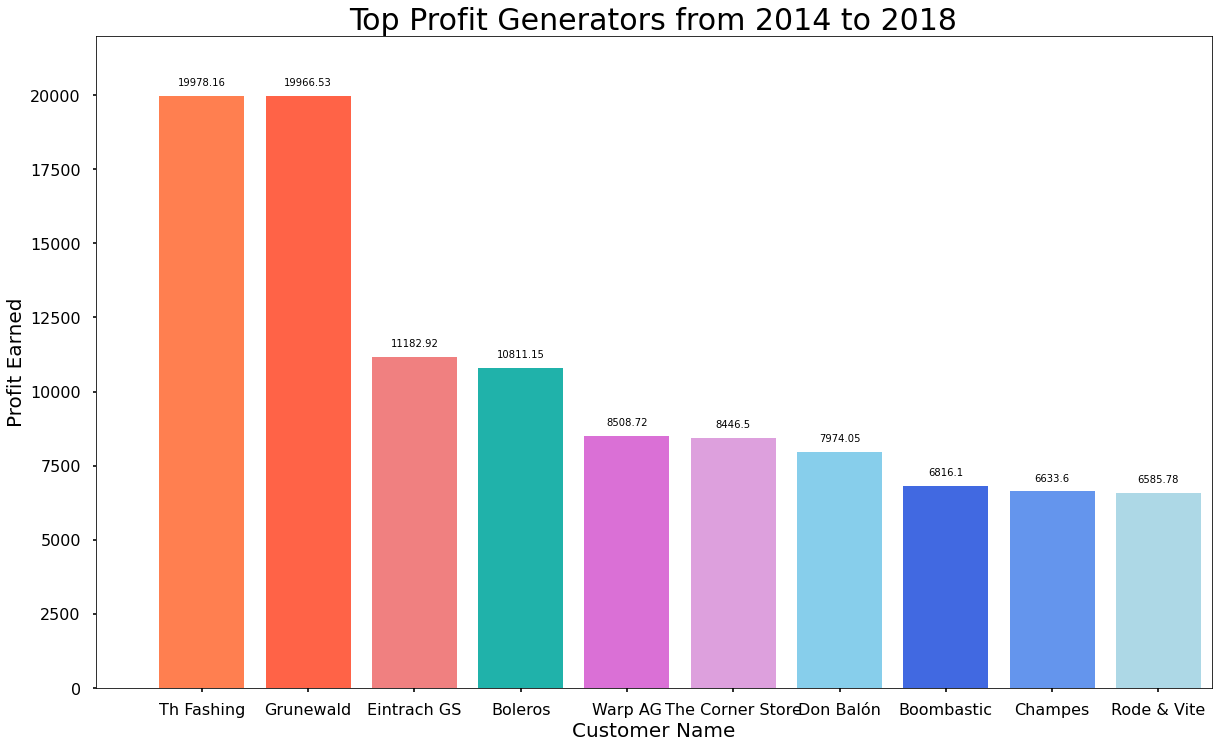

In [8]:
# Bar Chart

# Plot using "classic" style
plt.style.use('seaborn-poster') 

# Set size of the plot
plt.figure(figsize=(20,12))

# Create a vertical bar chart using data 
plt.bar(customer, total_profits, color=['coral', 'tomato','lightcoral','lightseagreen','orchid','plum','skyblue','royalblue','cornflowerblue','lightblue','lightsteelblue'],align='center') # align define the alignment of x-ticks

# State title of plot and the axes labels
plt.title('Top Profit Generators from 2014 to 2018', fontsize=30)
plt.ylabel('Profit Earned', fontsize=20)
plt.xlabel('Customer Name', fontsize=20)

# Set ranges for the x-axis and y-axis
plt.ylim(bottom=0,top=22000)
plt.xlim(left=-1,right=9.5)

# Display data labels
for x,y in zip(customer,total_profits):

    label = round(y, 2)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Display the plot 
plt.show()

### Visualisation 2

[Back to top](#top)

In [9]:
# Data Preparations
frequency = df.groupby('Product CategoryName')['Quantity'].sum() # quantity of each product Category 
frequency.sort_values(ascending=False, inplace=True) # sorting values in Descending order 
pdt_cat = frequency.index

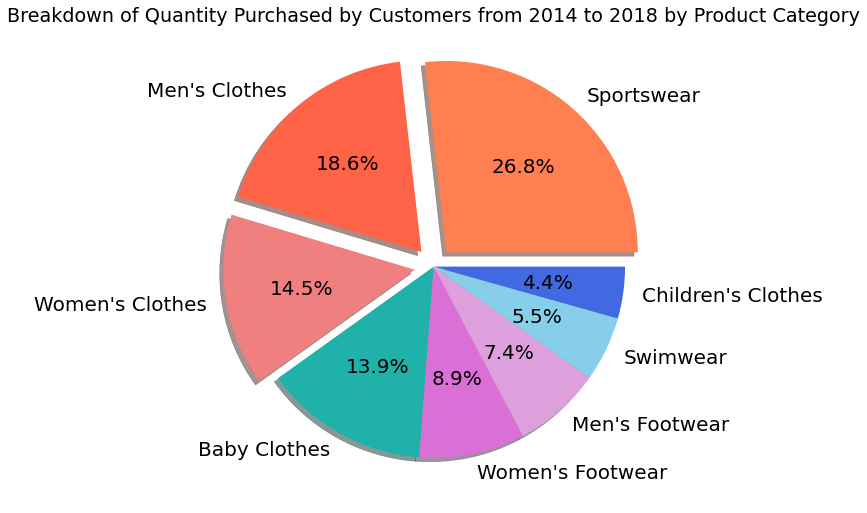

In [10]:
# pie chart

# Exploded ONLY Top 3 Product Categories with highest Quantity 
plt.pie(frequency,explode=(0.1,0.1,0.1,0,0,0,0,0),
        labels=pdt_cat, autopct='%1.1f%%', colors = ['coral', 'tomato','lightcoral','lightseagreen','orchid','plum','skyblue','royalblue'], 
        textprops={'fontsize': 20}, shadow=True)
# Pie Chart Title 
plt.title('Breakdown of Quantity Purchased by Customers from 2014 to 2018 by Product Category') 

plt.show()

### Visualisation 3

[Back to top](#top)

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

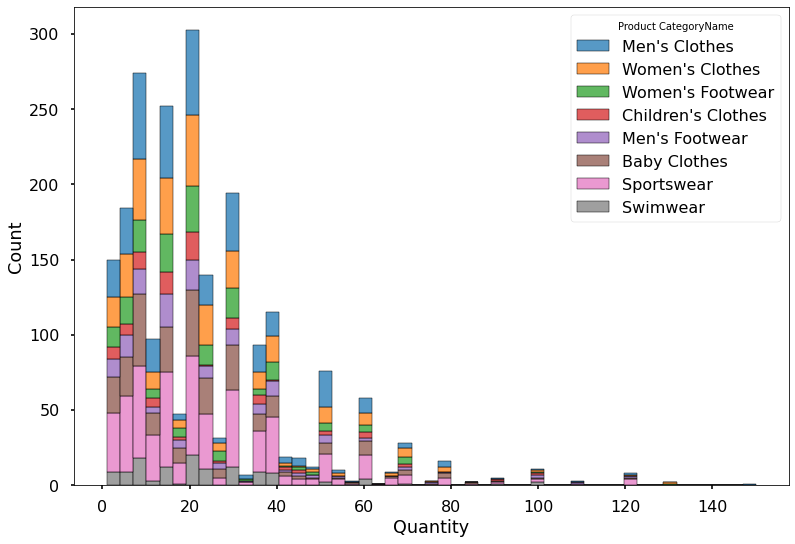

In [11]:
# Visualisation #3 
# Histogram
# positively skewed distribution 

# Output is stacked to see the distribution more clearly
sns.histplot(data=df, x="Quantity", hue="Product CategoryName", multiple="stack") 

### Visualisation 4

[Back to top](#top)

In [1]:
# Violin PLot

# List of colors by Product Category 
pdt_cat_colors = ['#78C850',  # Men's Clothes 
                    '#F08030',  # Women's Clothes
                    '#6890F0',  # Women's Footwear
                    '#F8D030',  # Children's Clothes 
                    '#FF5733',  # Men's Footwear
                    '#EE99AC',  # Baby Clothes 
                    '#98D8D8',  # Sportswear
                    '#A569BD',  # Swimwear
                   ]

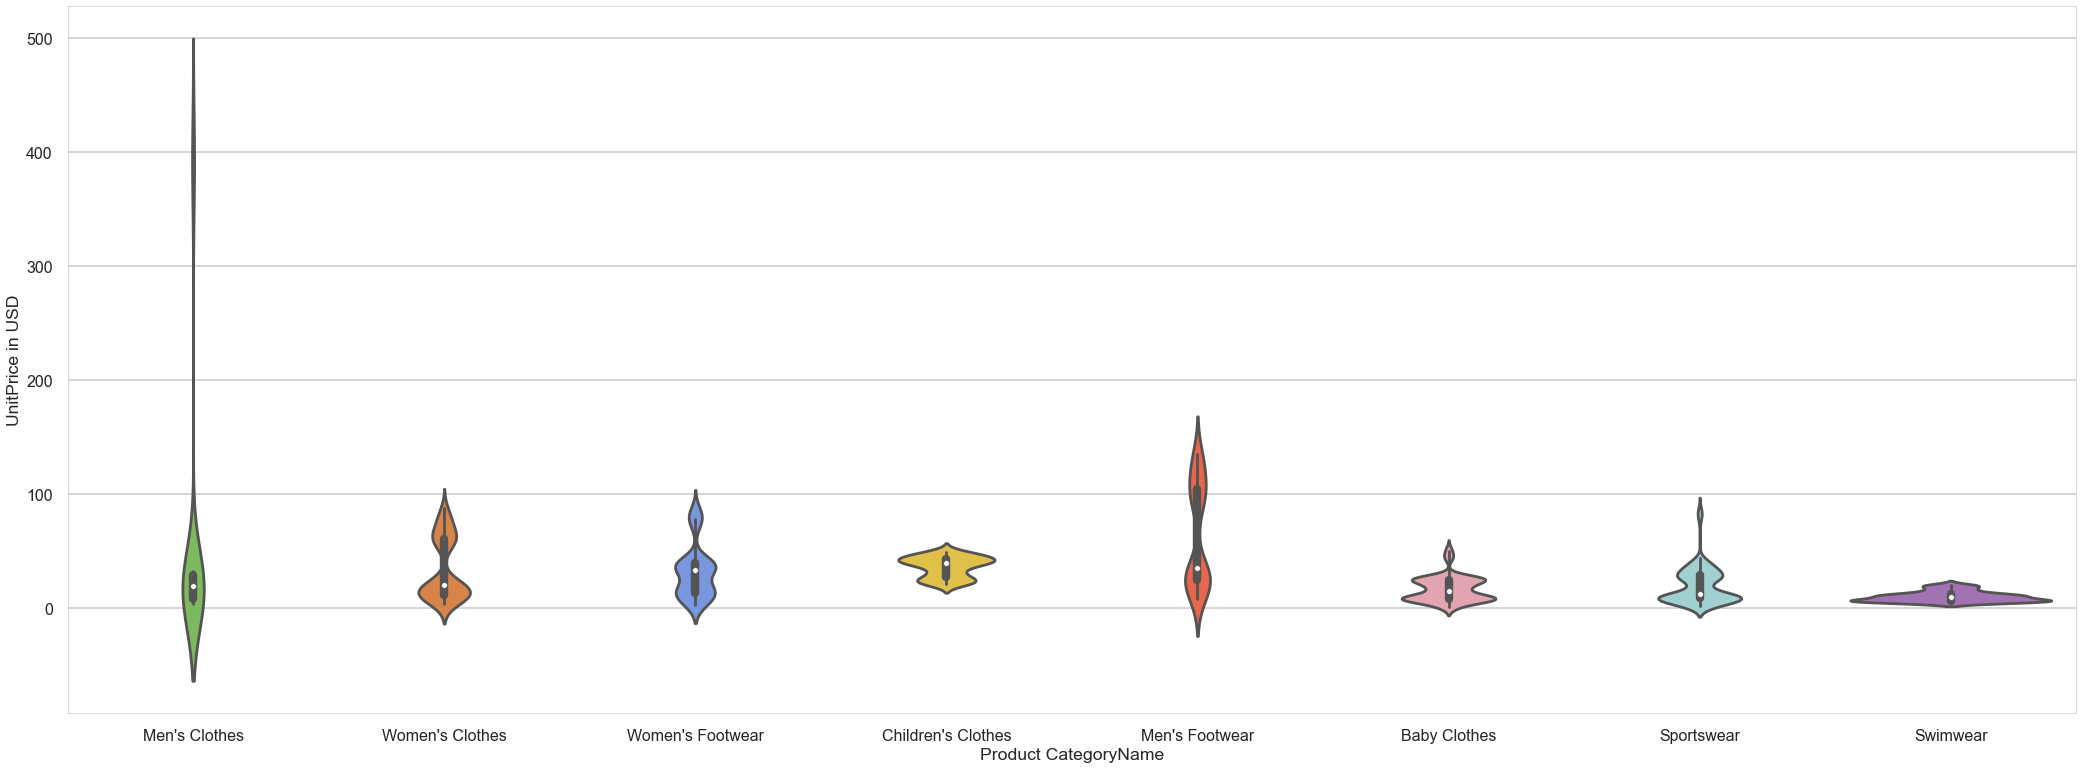

In [13]:
# Set figure size
plt.figure(figsize=(36,13))

# Set theme
sns.set_style('whitegrid')
 
# Violin plot with Product CategoryName as color 
sns.violinplot(x='Product CategoryName', y='UnitPrice in USD', data=df,
               palette=pdt_cat_colors) # Set color palette)

# Display the plot
plt.show()

### Visualisation 5

[Back to top](#top)

In [14]:
# Data Preparations
# Define x-axis and y-axis data values
profits = df.groupby('Customer Country')['Profits'].sum() # Profits by Customer Country 
revenue  = df.groupby('Customer Country')['Revenue'].sum()  # Revenue by Customer Country
x_labels = profits.index

C:\Users\Shannon\AppData\Local\Temp/ipykernel_13024/2555365460.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=60)


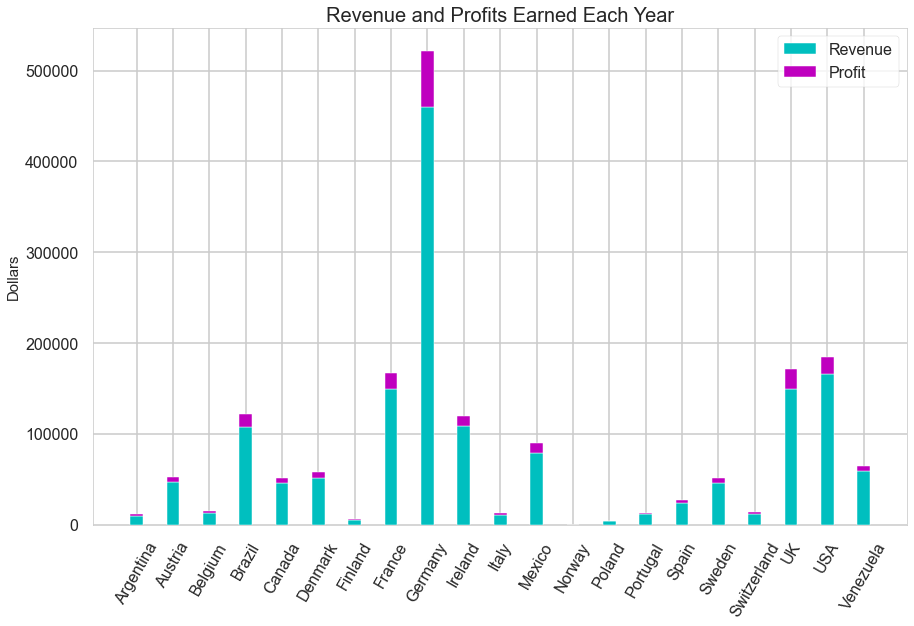

In [15]:
# Stacked Bar Chart

# Set the width of the bars
width = 0.35 

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax = plt.subplots() # both "ax" and "axes" are commonly adopted

# Plot stacked bars
ax.bar(x_labels, revenue, width, label='Revenue', color = 'c')
ax.bar(x_labels, profits, width, bottom=revenue, label='Profit', color = 'm') 
ax.set_xticklabels(x_labels, rotation=60)

# Set title, y-axis label and show legend
ax.set_title('Revenue and Profits Earned Each Year', fontsize = 20)
ax.set_ylabel('Dollars', fontsize = 15)
ax.legend()
    
# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

### Visualisation 6

[Back to top](#top)

In [16]:
# Data Preparations
temp = df[df['Order Year']==2018] # Slicing data for ONLY those in the Year 2018, data is stored in a temporary variable 
temp.head() # Assessing Data to see if output is accurate 

,OrderID,Order Year,Order Quarter,Order Month,Order Day,Customer Name,Customer Country,Customer City,ProductName,Product CategoryName,Quantity,UnitPrice in USD,Unit Discount in %,UnitCost in USD,Shipper Name,Freight Cost (Paid by Customer),Revenue,Profits
0,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Desperado Jeans,Men's Clothes,12,28.62,0.00,21.10,SafeAndFast,175.93,343.44,90.24
1,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Oyaki Kimono,Women's Clothes,5,12.71,0.00,8.96,SafeAndFast,175.93,63.55,18.75
2,10248,2018,Qtr 1,January,30,Dr Jims Trousers,UK,London,Walking Shoes,Women's Footwear,10,14.04,0.00,10.95,SafeAndFast,175.93,140.40,30.90
5,10250,2018,Qtr 1,February,3,El Carnevale,Brazil,Rio de Janeiro,Duck Shirt,Baby Clothes,10,9.59,0.00,7.28,SafeAndFast,825.07,95.90,23.10
6,10250,2018,Qtr 1,February,3,El Carnevale,Brazil,Rio de Janeiro,Stretch Pants,Women's Clothes,15,9.47,0.15,8.68,SafeAndFast,825.07,120.74,-9.46


In [17]:
# Data Preparations

# reindex is involved because the months did not order chronologically 
mth = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
total_revenue  = temp.groupby(['Order Month'])['Revenue'].sum().reindex(mth) # revenue by Order Month in 2018 ONLY (y axis)
months = total_revenue.index # (x axis)

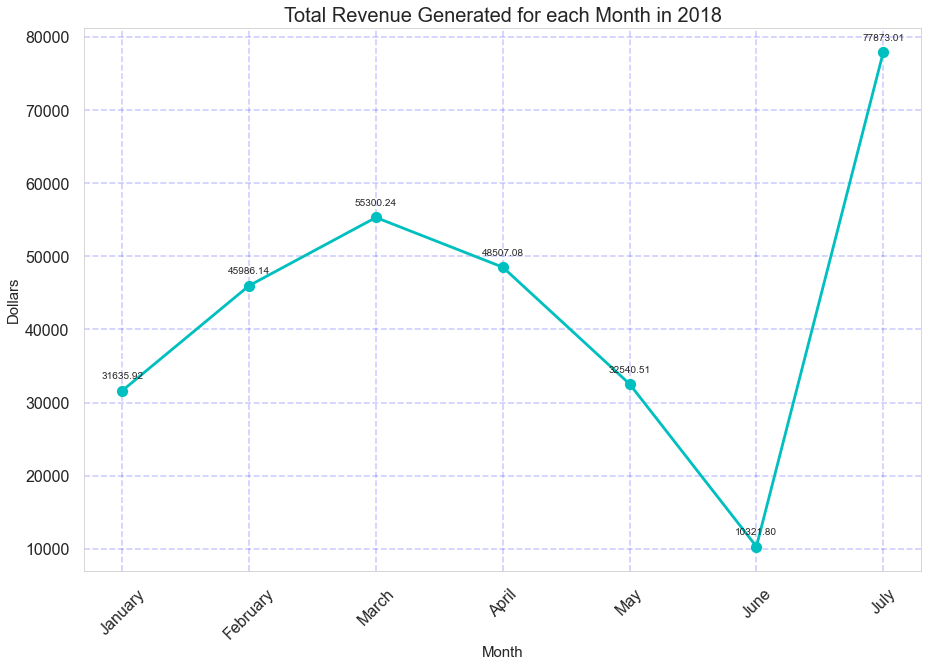

In [18]:
# Line Graph

# Plot using "classic" style
plt.style.use('seaborn-poster') 

# Set size of the plot
plt.figure(figsize=(15,10))

# State title of plot and the axes labels
plt.title('Total Revenue Generated for each Month in 2018', fontsize=20)
plt.ylabel('Dollars',fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.xticks(rotation=45)
plt.grid(c = 'b', alpha = .2, linestyle = '--')
for x, y in zip(months,total_revenue): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,12), # distance from text to points (x,y)                
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(months,total_revenue,'c-o')

### Visualisation 7 

[Back to top](#top)

Text(0, 0.5, 'Unit Discount in %')

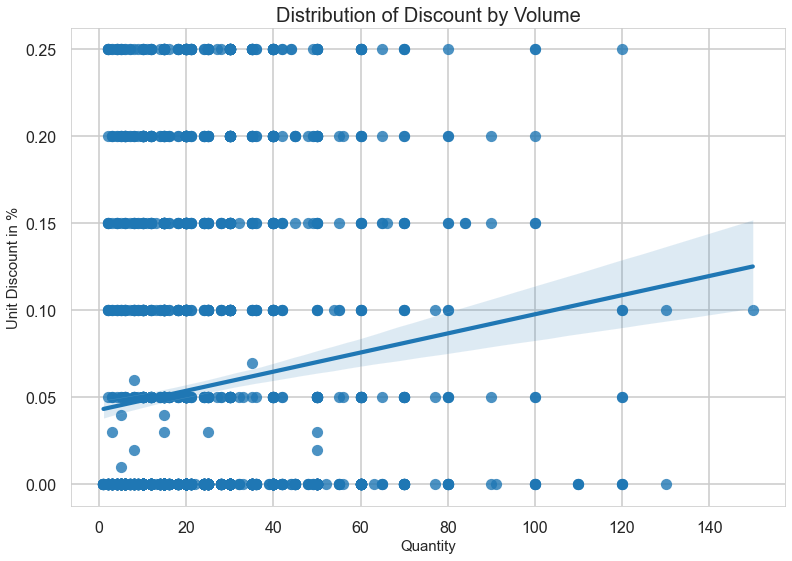

In [19]:
sns.regplot(x='Quantity', y='Unit Discount in %', data=df,
           fit_reg=True, # Regression line is shown 
           )  
plt.title('Distribution of Discount by Volume',fontsize=20)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('Unit Discount in %', fontsize=15)

###  3.2 Core Findings & Insights <a id="part3.2"></a> 
[Back to top](#top)

After looking through the few simple visualisations that I have created, I am now able to clearly summarise my core findings and insights from the data given. I found that many customers were interested in buying **Sportswear**, followed by **Men's and Women's wear** the most. In constrast, the _Unit Price in USD_ for Men's wear saw the most variation in price from 2014 to 2018 while _Swimwear_ saw the least variation in price. I also found out that majority of customers placed their orders with a quantity of around 20 to 21 products from 2014 to 2018. It can also be noted that DART Pte Ltd has the smallest customer base in Nordic Countries where **Norway** and **Finland** as well as **Poland** can be found, as these areas saw the least profits and revenues generated for the company. Another interesting finding was that from June 2018 to July 2018, DART experienced a sudden and exponential increase in revenue. A somewhat linear regression line plotted on the scatter plot from visualisation 7 indicates that the discout offered by DART Pte Ltd is directly correlated to the quantity a customer decides to purchase from the company. 

Some insights that I have drawn has a lot to do with the Product Cateogory, I realised that DART could afford to invest more in the Men's wear, Sportswear and Women's wear as they are the top 3 profit earners for DART. More campaigning could also be put in place for countries in Nordic Countries such as **Norway**, **Finland** or **Poland** to increase DART's customer base and attract more people to DART. Since majority of customers also buy around 20 to 21 products, DART could start an Annual Sale (e.g. Discounts for buying a certain number) all products, to boost sales for products that are not doing as well all while incentivising customers to keep coming back to buy more products from DART. 

### 3.3 Description of Visualisations & Which Question it Answers <a id="part3.3"></a> 
[Back to top](#top)

### Visualisation 1 

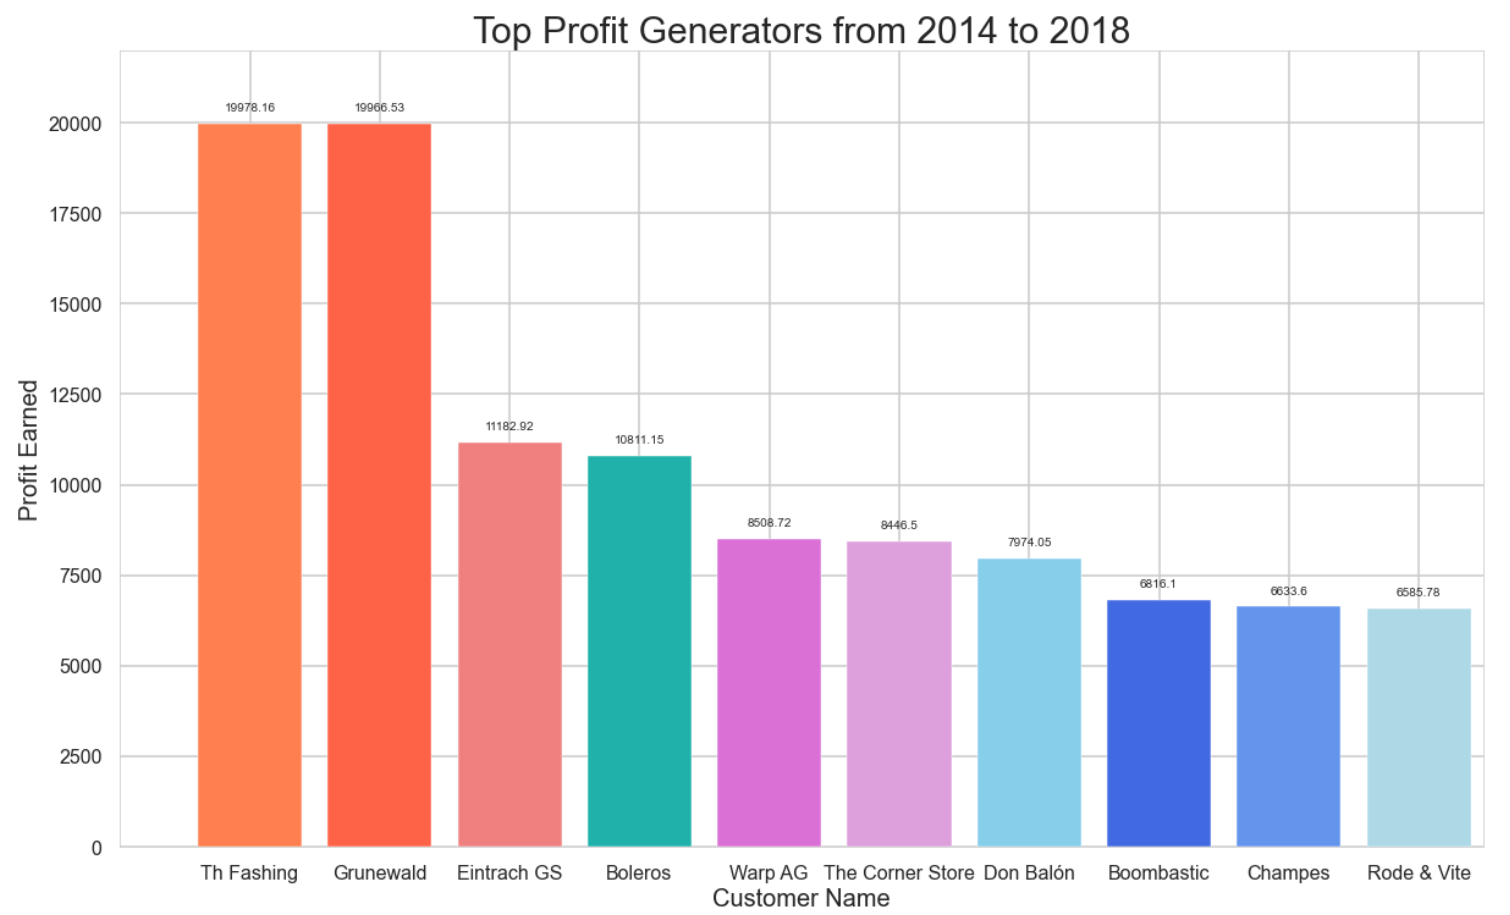

Visualisation 1 is a simple bar chart which shows the top 5 customers (by **Customer Name**) who are the top profit generators from 2014 to 2018 for Dart Pte Ltd. It is color coded by Customer Name, the annotation shows the total profit generated by each customer. __This visualisation answers Question 1: Which customers generated the most profit in the past 5 years? Who was the most frequent customer? The answer can be seen from the visualisation as **Th Fishing** who earned the company at $19978.16 dollars from 2014 to 2018__

### Visualisation 2 

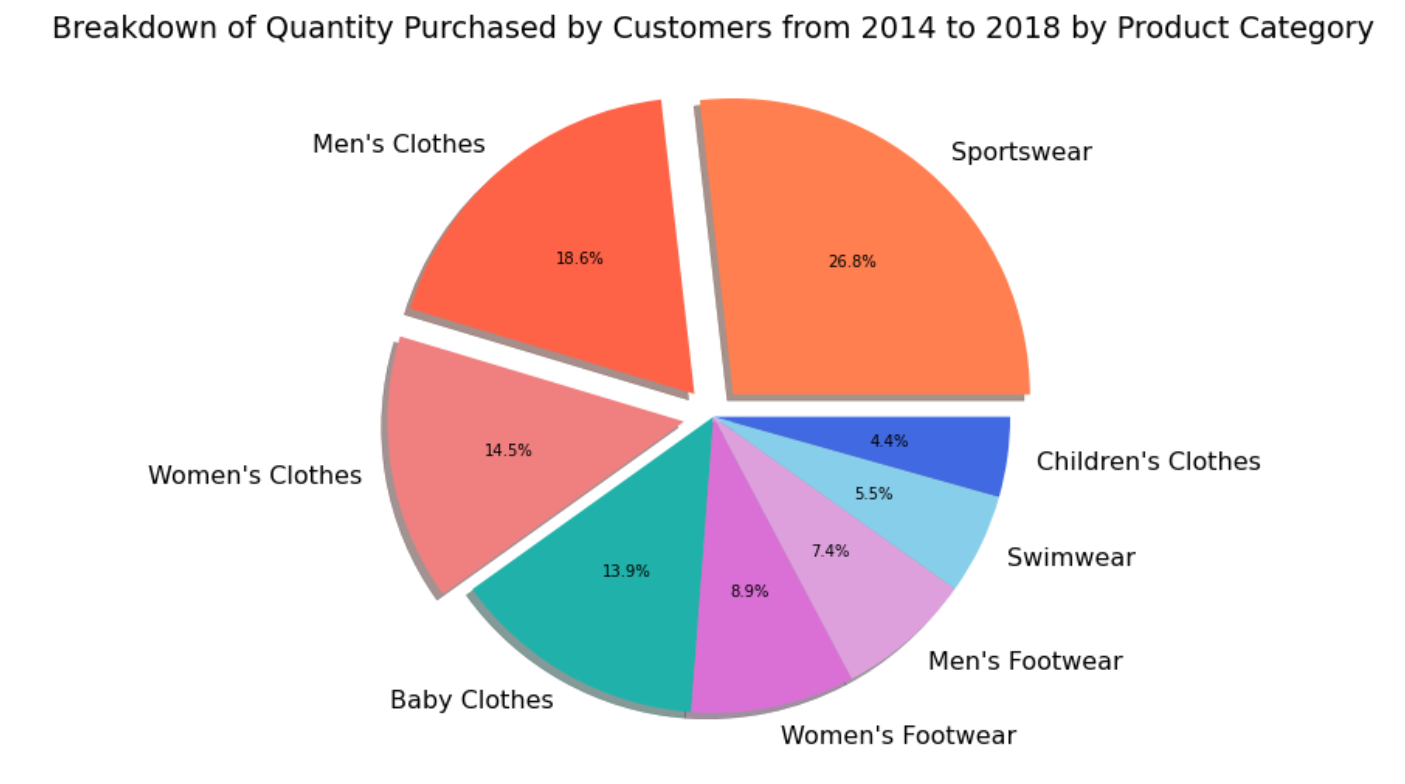

Visualisation 2 is a pie chart which shows the _percentage breakdown_ of Quantity of Products purchased by customers from 2014 to 2018 by Product Category. The annotations show the percentage of total quantity of products that that product category belongs to. The **Top 3** Product Categoriers with the highest percentages of quantity have been segregated from the rest of the pie chart. __This visualisation answers Question 2: What are the top 3 Product Categories that were purchased the most frequently by customers? The answer can be seen from the visualisation, starting from the 1st highest as **Sportswear**, followed by **Men's Clothes**, then **Women's Clothes** are the top 3 Product Categories that were purchased the most frequently by customers from 2014 to 2018.__

### Visualisation 3: 


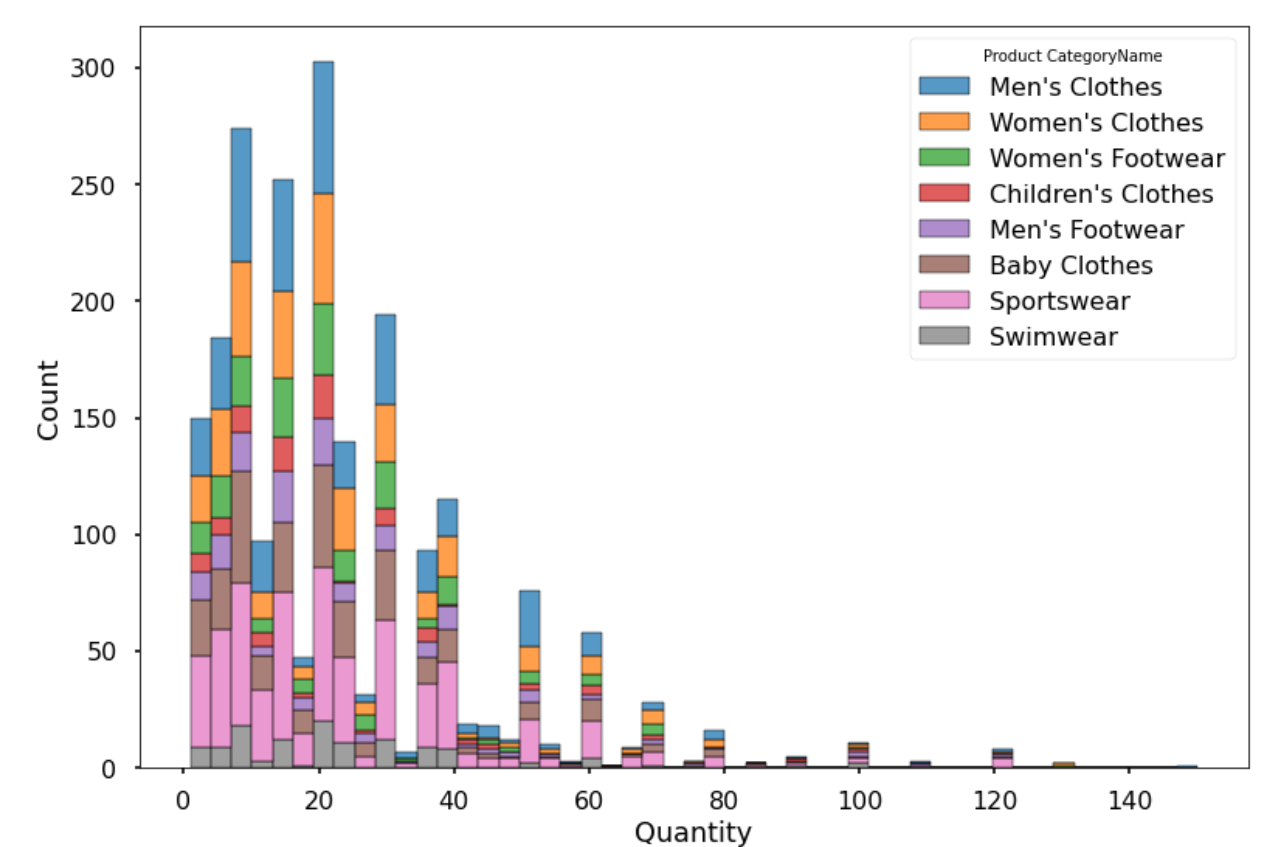

Visualisation 3 is a stacked histogram which shows a **positively skewed distribution** of the quantity of products bought by customers from 2014 to 2018 by Product Category. There is a range of colors as shown in the legend, each representing a different product category. There are a total of **8 product categories** in total. __This visualisation answers Question 3: What is the most common quantity of products (by Product CategoryName) that customers usually buy? The answer can be seen from the visualisation which shows **21 products** to be the _most common_ quantity of products bought by customers from DART Pte Ltd.__

### Visualisation 4: 

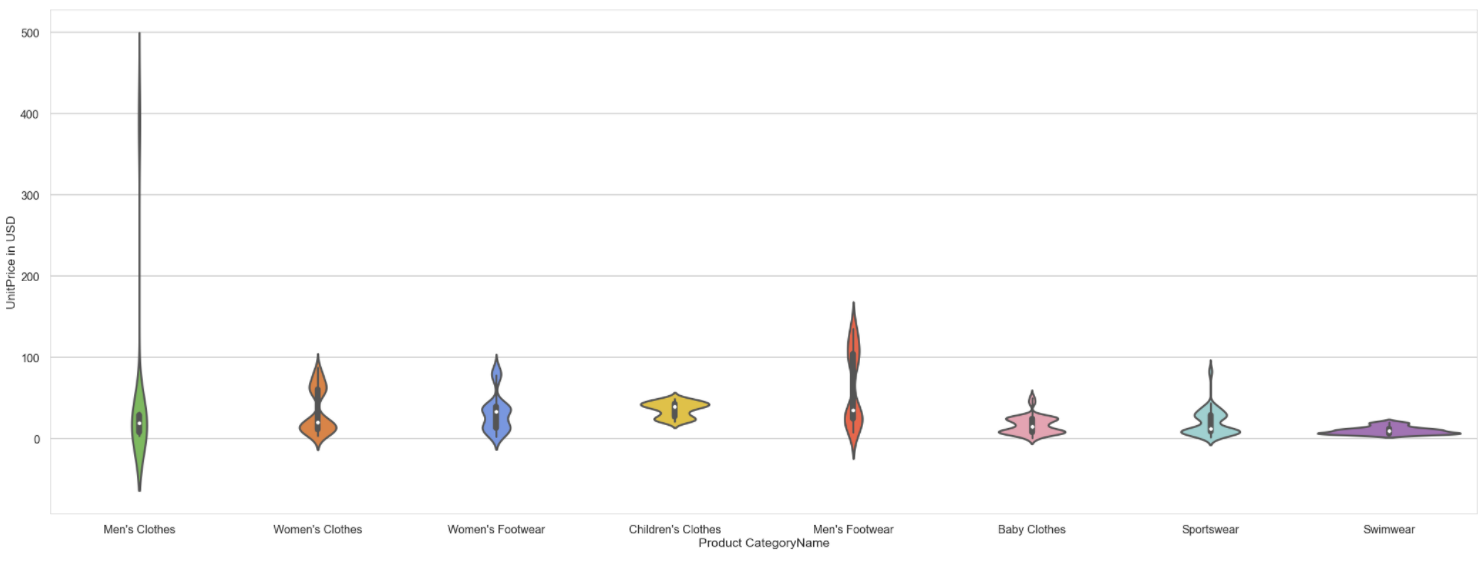

Visualisation 4 is a violin plot which shows a the distribution of Unit Price in USD by each Product Category. A different color is given to each violin to categorize by Product Category. It shows each violin's interquartile range and median. __This visualisation answers Question 4: Does the product unit price vary across Product Category? Which shows the most and least variation? The answer can be seen from the visualisation which shows _Men's clothes_ with the **most** variation and _Swimwear_ with the **least** variation from their unit price distribution from 2014 to 2018.__

### Visualisation 5: 

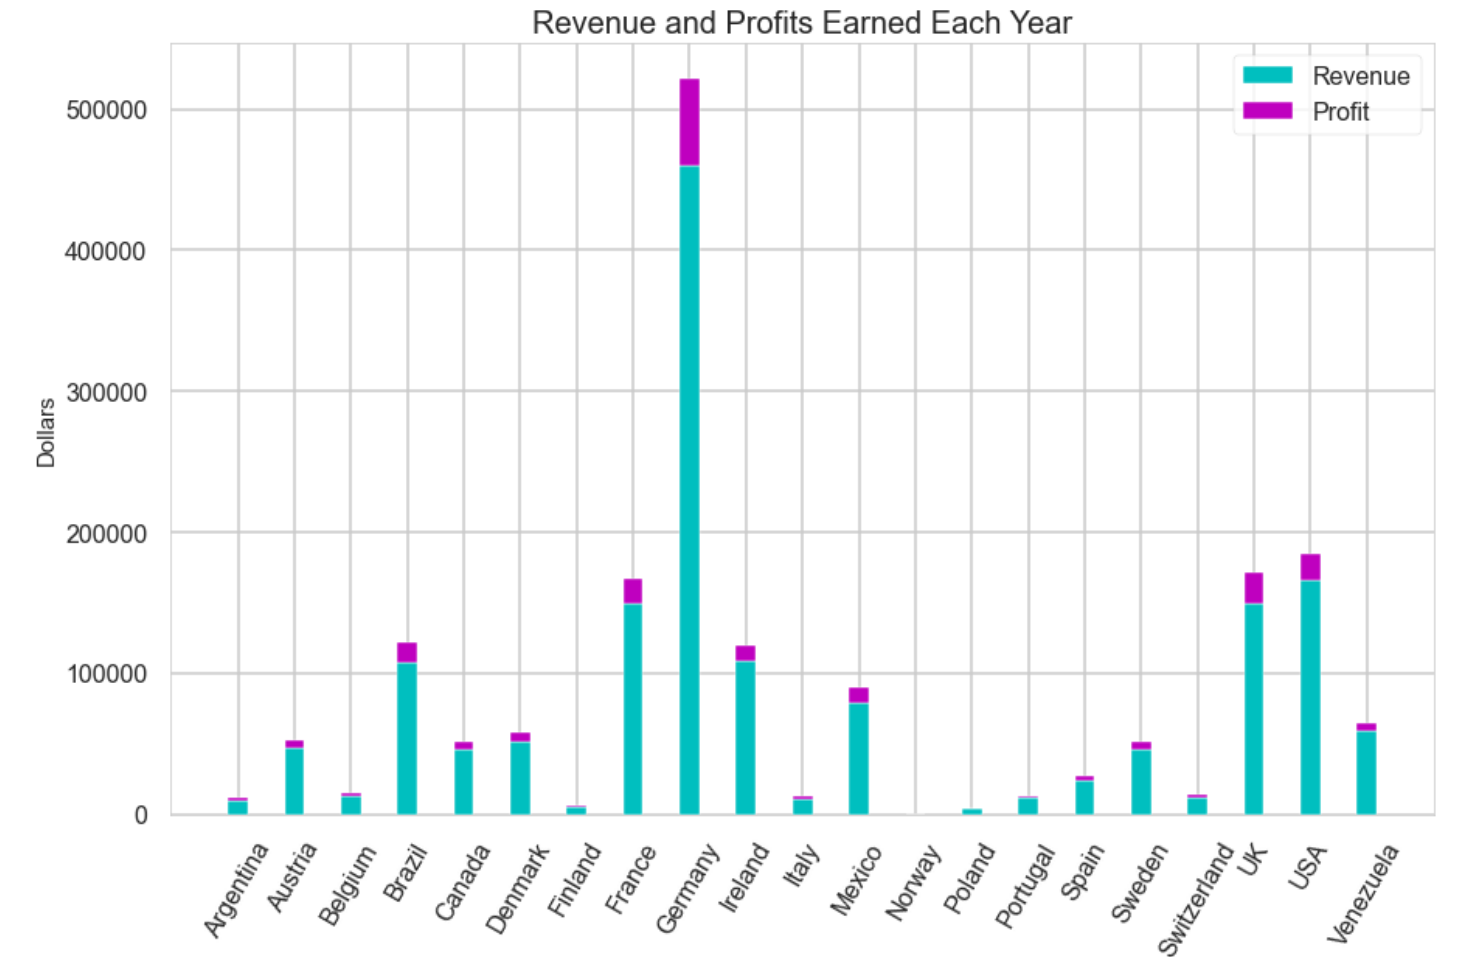

Visualisation 5 is a stacked bar chart which shows the profits and revenue earned from 2014 to 2018 by DART Pte Ltd from each customer city. The colors distingushes revenue from profits earned. __This visualisation answers Question 5: Which countries generated the least revenue and profits in the last 5 years? The answer can be seen from the visualisation which shows **Norway**, **Poland**, **Finland**, **Belgium** and **Italy** being the top few countries which generated the _least revenue and profits_ for DART Pte Ltd in the last 5 years.__

### Visualisation 6: 

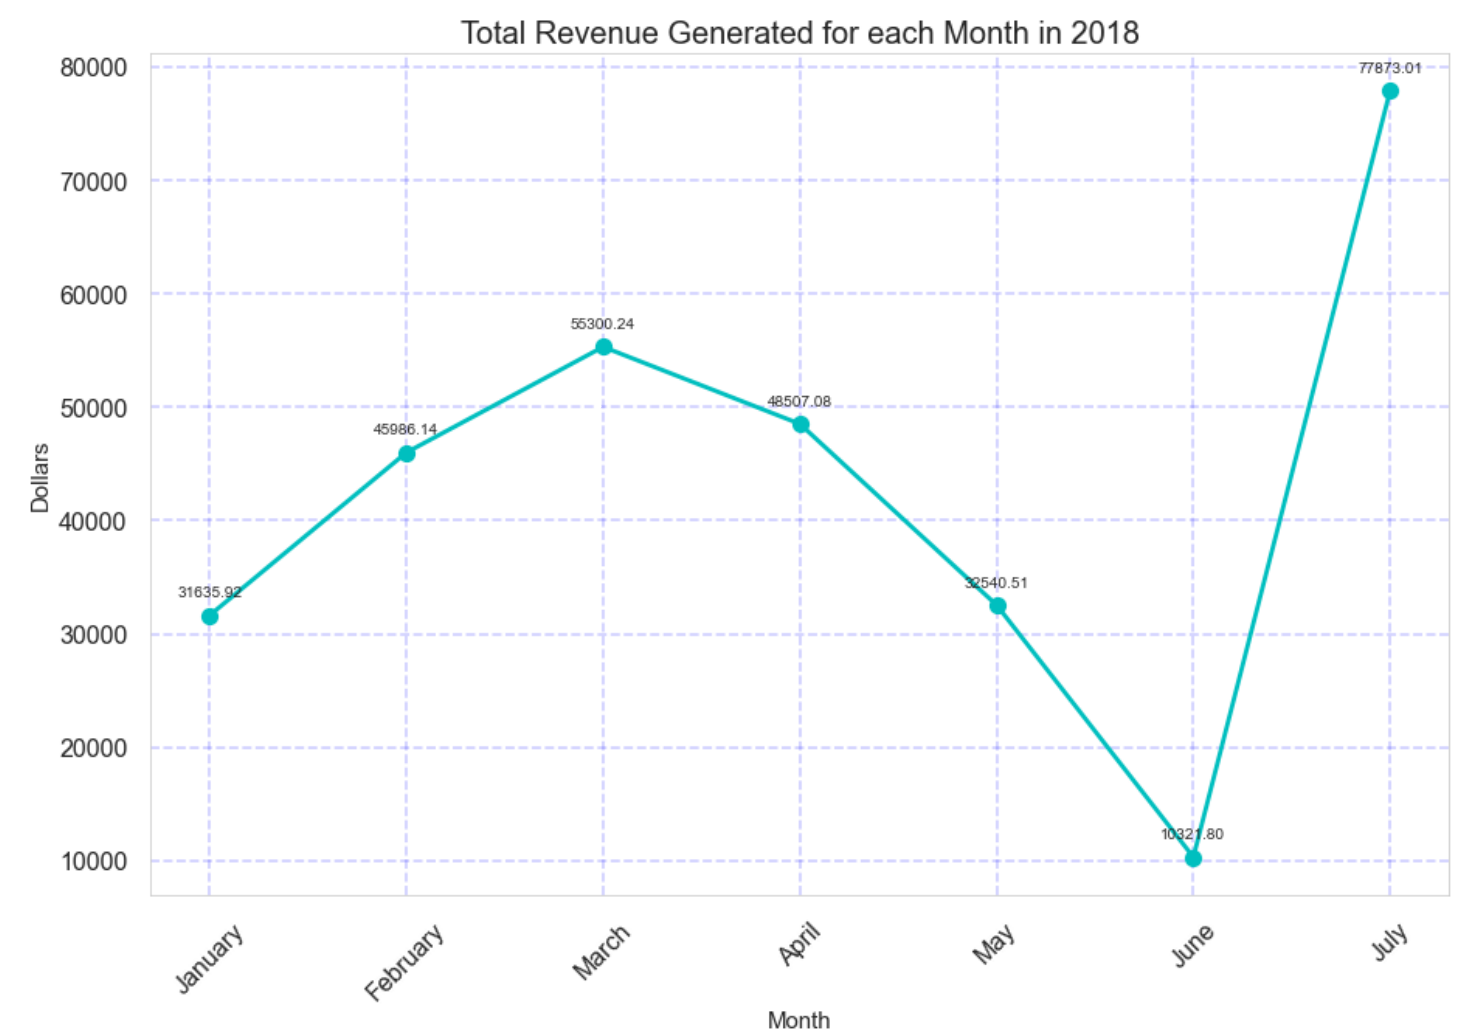

Visualisation 6 is a simple line graph which shows the total revenue generated for each month in the year 2018. There is a steady increase then decrease in revenue over the first few months from January to June. The highest peak was in March. Unfortunately, DART's revenue in 2018 hit an all-time low in June. __This visualisation answers Question 6: Which month in 2018 saw the highest increase in revenue generated? How much was the increase? The answer can be seen from the visualisation which shows June 2018 seeing a **suddden and exponential increase** in revenue generated for DART Pte Ltd. The increase in revenue is 67,551.21‬ from _10321.80 in June 2018_ to a whopping _77,873.01 generated in July 2018_ for the company.__ 

### Visualisation 7: 

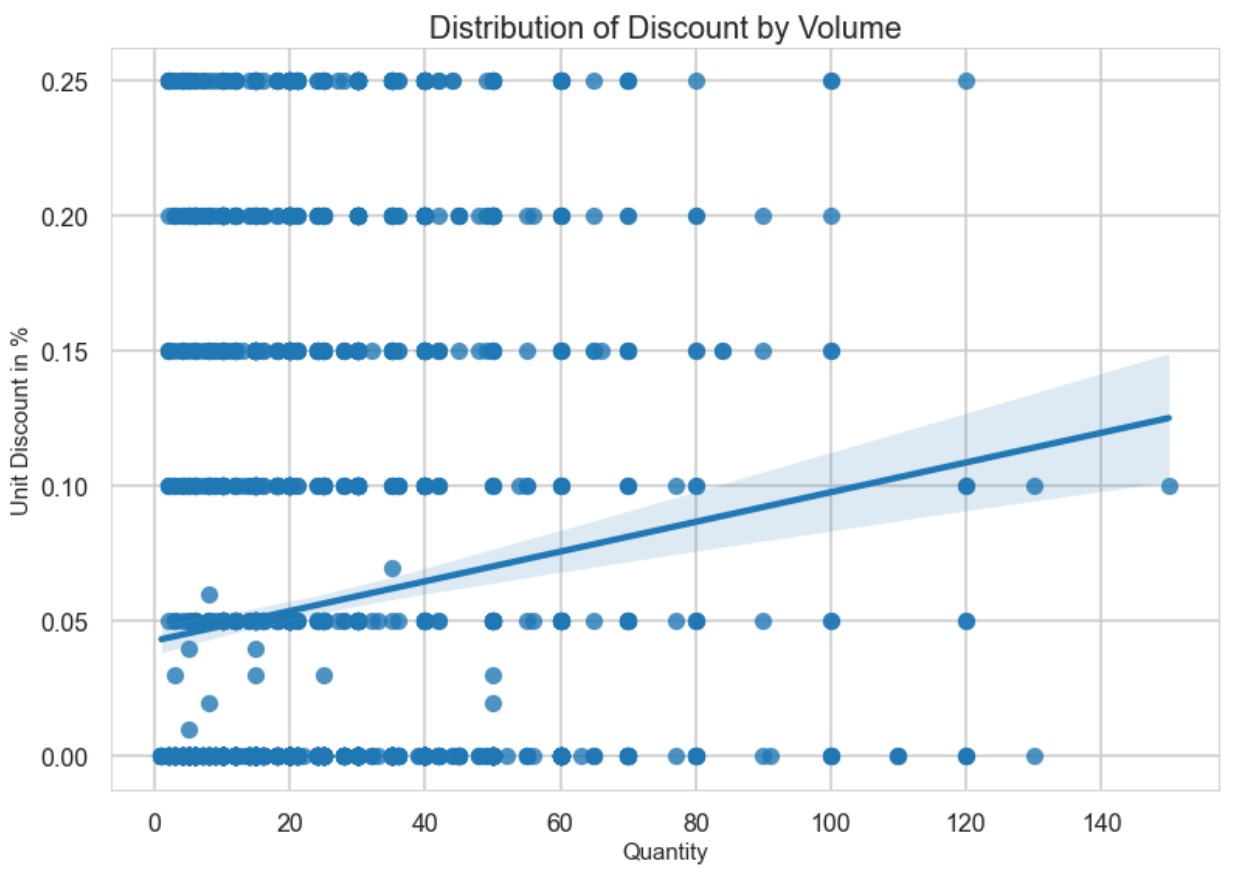

Visualisation 7 is a scatter plot which shows the distribution of discount offered in % by the volume _(measured by Quantity)_ bought by customers from 2014 to 2018. __This question answers Question 7: How does the discount offered vary with volume? Is there a linear or exponential increase in discount? The answer can be seen from the visualisation which shows a somewhat **linear regression line** plotted on the scatter plot, indicating that the discout offered by DART Pte Ltd is _directly correlated_ to the quantity a customer decides to purchase from the company.__

# Dashboard <a id="part4"></a>
[Back to top](#top)

### Dashboard for Yearly Revenue & Profits Distribution and Breakdown by Product Category

C:\Users\Shannon\AppData\Local\Temp/ipykernel_13024/844560558.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, rotation=60)


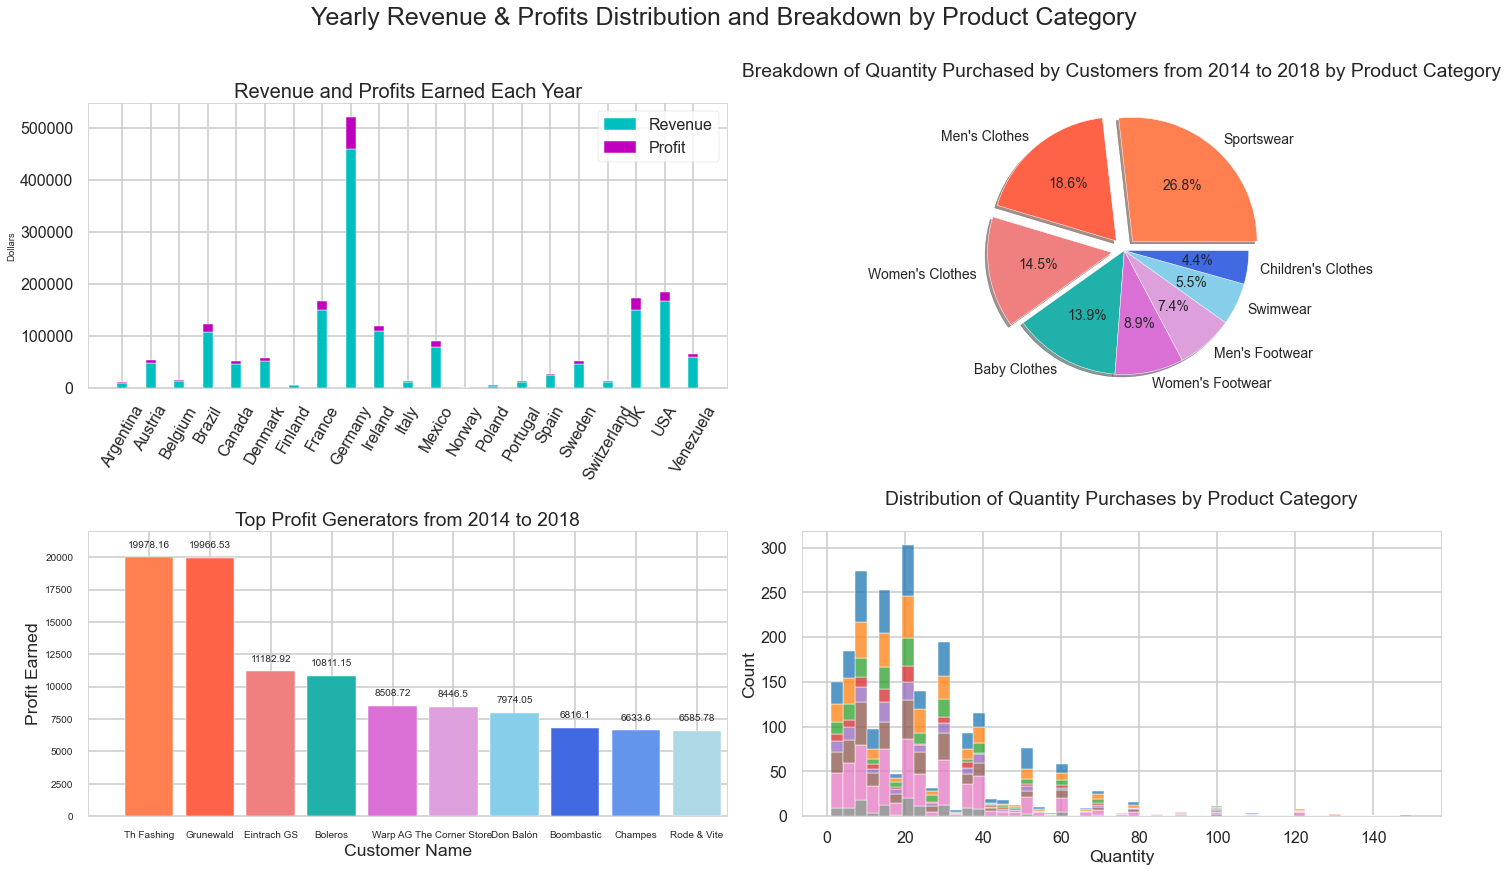

In [20]:
# import GridSpec package from matplotlib
from matplotlib.gridspec import GridSpec

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(20,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)

# Define subplots and their corresponding positions (row by index)
ax1 = fig.add_subplot(gs[1, :-1]) 
ax2 = fig.add_subplot(gs[0, 0]) 
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, -1])

# Visualisation 1 (bar chart)
total_profits = df.groupby('Customer Name')['Profits'].sum()
total_profits.sort_values(ascending=False, inplace=True)
customer = total_profits.index
ax1.bar(customer, total_profits, color=['coral', 'tomato','lightcoral','lightseagreen','orchid','plum','skyblue','royalblue','cornflowerblue','lightblue','lightsteelblue'],align='center') # align define the alignment of x-ticks
ax1.set_title('Top Profit Generators from 2014 to 2018')
ax1.set_ylabel('Profit Earned')
ax1.set_xlabel('Customer Name')
ax1.set_ylim(bottom=0, top=22000)
xmin, xmax = -1,9.5
ax1.set_xlim(xmin, xmax)
ax1.tick_params(labelsize=10, axis = 'both')
# Display data labels
for x,y in zip(customer,total_profits):

    label = round(y, 2)

    ax1.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Visualisation 5 (stacked bar chart)
profits = df.groupby('Customer Country')['Profits'].sum()
revenue  = df.groupby('Customer Country')['Revenue'].sum()
x_labels = profits.index
width = 0.35 
ax2.bar(x_labels, revenue, width, label='Revenue', color = 'c')
ax2.bar(x_labels, profits, width, bottom=revenue, label='Profit', color = 'm') 
ax2.set_xticklabels(x_labels, rotation=60)
ax2.set_title('Revenue and Profits Earned Each Year', fontsize = 20)
ax2.set_ylabel('Dollars', fontsize = 9.5)
ax2.legend()

# Visualisation 2 (pie chart)
frequency = df.groupby('Product CategoryName')['Quantity'].sum()
frequency.sort_values(ascending=False, inplace=True)
pdt_cat = frequency.index
ax3.pie(frequency,explode=(0.1,0.1,0.1,0,0,0,0,0),
        labels=pdt_cat, autopct='%1.1f%%', colors = ['coral', 'tomato','lightcoral','lightseagreen','orchid','plum','skyblue','royalblue']
        , textprops={'fontsize': 14}, shadow=True)
ax3.axis('equal')
ax3.set_title('Breakdown of Quantity Purchased by Customers from 2014 to 2018 by Product Category\n')

# Visualisation 3 (histogram)
ax4=sns.histplot(data=df, x="Quantity", hue="Product CategoryName", multiple="stack",legend=False)
ax4.set_title('Distribution of Quantity Purchases by Product Category\n')
ax4.set_xlabel('Quantity')
ax4.set_ylabel('Count')

# Set title of dashboard
fig.suptitle("Yearly Revenue & Profits Distribution and Breakdown by Product Category\n", fontsize=25)

# Display plot
plt.show()

# Conclusion <a id="part5"></a>

[Back to top](#top)

**In order to increase revenue and profits for 2019, the visualisations created thus forth here help to see that DART will need to start investing more in Nordic countries to help increase customer base there or attract more potential customers to buy our products through more advertising and campaigns there.** 

**It can also be noted that increasing partnerships between the Top Profit Generators such as Grunewald or Th Fashing will help to build their trust in DART and continue to support DART through more purchases in the future. Spending habits of customers in the last 5 years may also allow us to innnovate on certain marketing strategies to incentivise more and potential customers to purchase from DART.**